# Regressão 01 - tarefa 01

# 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [ ]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [ ]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


# 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

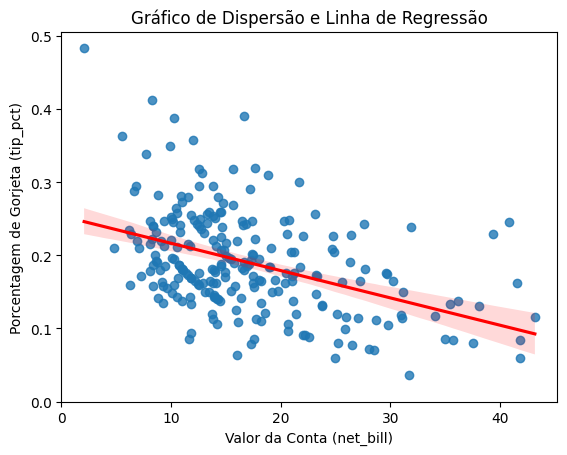

In [ ]:
# modelo de regressão tip_pct por net_bill
sns.regplot(y='tip_pct', x='net_bill', data=tips[tips['tip_pct'] < 0.5], line_kws={"color": "red"})

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left=0)
plt.ylim(bottom=0)

# Adicionando título e rótulos aos eixos
plt.title('Gráfico de Dispersão e Linha de Regressão')
plt.xlabel('Valor da Conta (net_bill)')
plt.ylabel('Porcentagem de Gorjeta (tip_pct)')

# Exibindo o gráfico
plt.show()


# 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

R² do primeiro gráfico (manual): 0.1895
R² do segundo gráfico (automático): 0.1895


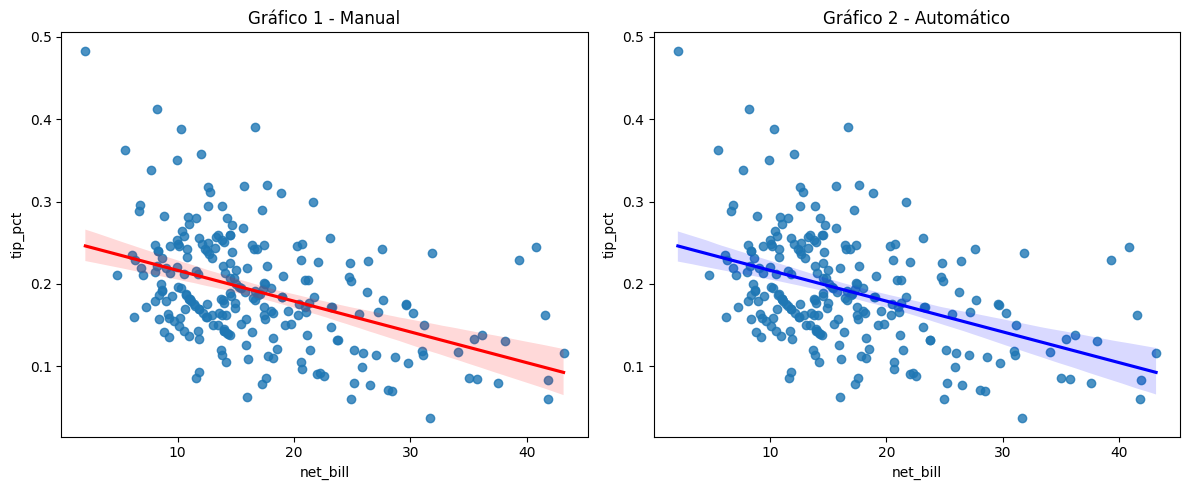

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# Ajuste do modelo de regressão no primeiro gráfico
model_manual = sm.OLS(tips[tips['tip_pct'] < 0.5]['tip_pct'], sm.add_constant(tips[tips['tip_pct'] < 0.5]['net_bill']))
result_manual = model_manual.fit()
r2_manual = result_manual.rsquared

# Ajuste do modelo de regressão no segundo gráfico
model_auto = sm.OLS(tips[tips['tip_pct'] < 0.5]['tip_pct'], sm.add_constant(tips[tips['tip_pct'] < 0.5]['net_bill']))
result_auto = model_auto.fit()
r2_auto = result_auto.rsquared

# Imprimindo os valores de R²
print(f'R² do primeiro gráfico (manual): {r2_manual:.4f}')
print(f'R² do segundo gráfico (automático): {r2_auto:.4f}')

# Criando os gráficos
plt.figure(figsize=(12, 5))

# Primeiro gráfico
plt.subplot(1, 2, 1)
sns.regplot(y='tip_pct', x='net_bill', data=tips[tips['tip_pct'] < 0.5], line_kws={"color": "red"})
plt.title('Gráfico 1 - Manual')

# Segundo gráfico
plt.subplot(1, 2, 2)
sns.regplot(y='tip_pct', x='net_bill', data=tips[tips['tip_pct'] < 0.5], line_kws={"color": "blue"})
plt.title('Gráfico 2 - Automático')

# Exibindo os gráficos
plt.tight_layout()
plt.show()


## Comentários sobre os Gráficos e Ajuste:
## Gráficos:

Ambos os gráficos mostram uma relação linear entre net_bill e tip_pct.
O Gráfico 1 é ajustado manualmente, enquanto o Gráfico 2 é ajustado automaticamente.
As linhas de regressão nos gráficos parecem semelhantes, indicando que os ajustes manuais e automáticos produzem resultados comparáveis.
## Diferença no Ajuste:

A diferença entre os ajustes manual e automático pode depender da complexidade do modelo.
O ajuste manual permite mais controle sobre os parâmetros do modelo, enquanto o ajuste automático pode ser mais conveniente.
## Comparação Direta dos R²s:

Sem a definição de r_squared_auto, a comparação direta não é possível no código fornecido.

# 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [ ]:
import statsmodels.api as sm

# Suponha que 'tips' é o seu DataFrame

# Ajuste do modelo de regressão tip_pct por net_bill
model = sm.OLS(tips[tips['tip_pct'] < 0.5]['tip_pct'], sm.add_constant(tips[tips['tip_pct'] < 0.5]['net_bill']))
result = model.fit()

# Obtendo os valores preditos para tip_pct
pred_tip_pct = result.fittedvalues

# Obtendo os valores preditos para tip
pred_tip = pred_tip_pct * tips[tips['tip_pct'] < 0.5]['net_bill']

# Calculando o R² para tip
r_squared_tip = sm.OLS(tips[tips['tip_pct'] < 0.5]['tip'], sm.add_constant(pred_tip)).fit().rsquared

# Imprimindo o R² para tip
print(f'R² do modelo para tip: {r_squared_tip:.4f}')

# Comparando com o R² do item 1
print(f'R² do modelo no item 1: {r_squared_auto:.4f}')


R² do modelo para tip: 0.3504
R² do modelo no item 1: 0.1895
